# Data Loading

## Data loading with Pandas
Load `adult` dataset using Pandas.

In [ ]:
import pandas as pd
data = pd.read_csv("/adult.csv", index_col=0)

In [ ]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
from os import EX_CANTCREAT
categorical variables:workclass, education, occupation, EX_CANTCREATnumerical variables: age, capital -gain, hour-per-week, etc.EX_CANTCREATLabel is dependent variable: income is a categorical or discrete variables
Therefor, our model will be a classsification model

## Simple analysis
- Check the shape of the dataset, 
- list the column names count number of unique values in `income` column, 
- plot the histogram of age grouped by income

In [ ]:
#shape of my dataset
data.shape
#among the 14 variables, one is the target or label

(32561, 14)

In [ ]:
cols = data.columns
print(cols)
cols[3]
cols[0]


Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


'age'

In [ ]:
#how many of my datasets have sal under 20k, and how many over?  also resolves the imbalance of the dataset
#counting on income: different values of income
data.income.value_counts()  #not very much imbalanced, we can work with it

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

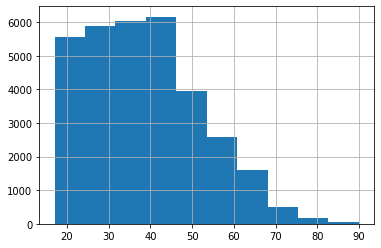

In [ ]:
#plot histogram, to see the frequency inside some bins, what is the distribution of age, histogram works on a continuous varianble
data.age.hist();
#right skewed dataset, meaning that the tail is extending to the right side, concentrating points on the left side
#showing frequency of my age group in bins

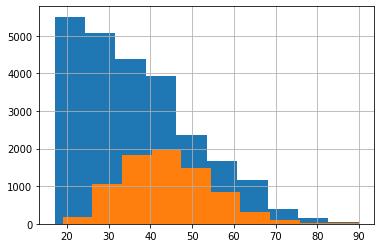

In [ ]:
data.groupby("income").age.hist();

# Splitting into training and test data

In [ ]:
y = data.income      #observa i did not delete the income, just assigned it
X= data.drop("income", axis=1)     #i want to separate the features from labels, so drop the income column, i.e. axis=1, to show that 1 column

In [ ]:
X.head()#no income column here

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
#splitting data in test and validate
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(32561, 13)
(24420, 13)
(8141, 13)


In [ ]:
#first five observations of y
y[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

# Exercise I 
Load the "boston house prices" dataset from the ``boston_house_prices.csv`` file using the ``pd.read_csv`` function (you don't need ``index_column`` here).
You can find a description of this dataset in the ``boston_house_prices.txt`` file.

This is a regression dataset with "MEDV" the median house value in a block in thousand dollars the target.
How many features are there and how many samples?

Split the data into a training and a test set for learning.
Optionally you can plot MEDV vs any of the features using the ``plot`` method of the dataframe (using ``kind="scatter"``).

In [ ]:
data_h = pd.read_csv("/boston_house_prices.csv")
print("Number of samples: ", data_h.shape[0])

Number of samples:  506


In [ ]:
data_h.shape[1]

14

In [ ]:
print("Number of samples:", (data_h.shape[0]))#that [0] reffers tp number of observations
print("Number of features:", (data_h.shape[1]))# that [1] is for number of features

Number of samples: 506
Number of features: 14


In [ ]:
print(data_h.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
X = data_h.drop("MEDV", axis=1)
y= data_h.MEDV 
X_train, X_test, y_train, y_test = train_test_split(X, y)#small letter for vectors, big letters for matrices

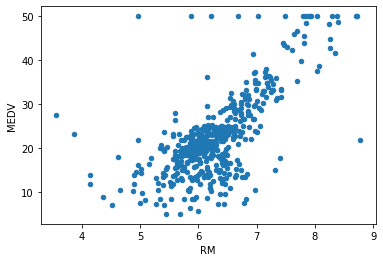

In [ ]:
#scatterplot for continuous variables, right after loading the dataset

data_h.plot("RM", "MEDV", kind='scatter' );

## Load Datasets from ScikitLearn
Load digits dataset from sklearn

# Exercise II

Load the iris dataset from the ``sklearn.datasets`` module using the ``load_iris`` function.
The function returns a dictionary-like object that has the same attributes as ``digits``.

What is the number of classes, features and data points in this dataset?
Use a scatterplot to visualize the dataset.

You can look at ``DESCR`` attribute to learn more about the dataset.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split

In [ ]:
iris= load_iris()
iris.keys() #checking the name of the columns, to select later the 2 cols: data and target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X, y = iris.data, iris.target

In [11]:
X.shape # 4 features

(150, 4)

In [13]:
y.shape #label

(150,)

In [14]:
#i am curious how the 10 labels looks like: 3 types of flower in iris, with its own name, type 1 flower is zero, type 2 flower is 1.etc
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
#to find out how many types of flower dowe have
np.unique(y)

array([0, 1, 2])

In [16]:
len(np.unique(y))  #how many different classes the dataset has

3

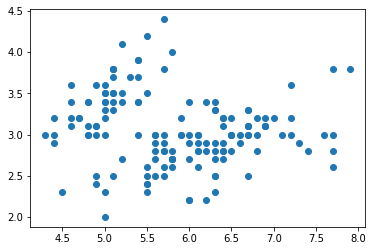

In [22]:
#to plot one feature, (out of 4 features in total for each flower)-- against another feature:

plt.scatter(X[:, 0], X[:, 1]); #OBSERVE THAT THEY ARE CORRELATED, when one feture increases, the other one increases too

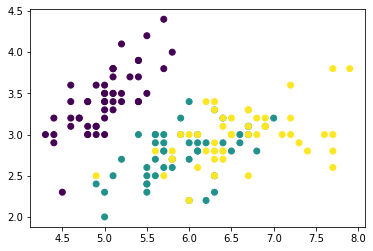

In [23]:
## let us map the colour for each of the classes:
plt.scatter(X[:, 0], X[:, 1], c=y);

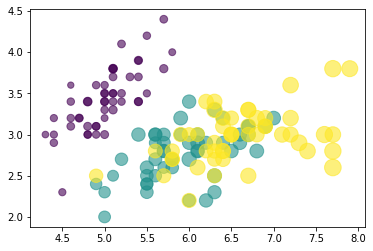

In [27]:
#let us represent feature1, feature2, and the third one, but the third will have the dot a bigger dot:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40* X[:,2], cmap="viridis", alpha=0.6); #intense ones, the ones with big numbers
